<a href="https://colab.research.google.com/github/louis8ok1/LSTM_Stock/blob/master/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part1: Data_Preprocessing

In [4]:
"""
#上傳檔案
from google.colab import files

uploaded = files.upload()
"""

'\n#上傳檔案\nfrom google.colab import files\n\nuploaded = files.upload()\n'

Normalization

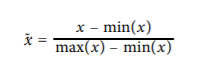

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the training set

training_set = pd.read_csv('TSMC_Stock_Train_data.csv')
#To convert the Vector form of a single column into a 2d Numpy array
training_set = training_set.iloc[:,1:2].values

#Using sklearn to normalize the training data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

normal = MinMaxScaler()

training_set = normal.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set[0:1294]
y_train = training_set[1:1295]

# Reshaping 

X_train = np.reshape(X_train, (1294, 1, 1))






### Part2: **Training**

EX:LSTM(units,input_shape(3,1))的units並不是cell(一個LSTM cell = 一層的LSTM)，而是**每個cell層的output dimension**

Epoch 1/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0938
Epoch 2/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 3/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0611
Epoch 4/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 5/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 6/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0565
Epoch 7/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0557
Epoch 8/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 9/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0540
Epoch 10/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 11/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0521
Epoch 12/200
41/41 [==============================] - 0s 1ms/step - loss: 0.0511
Epoch 13/200
41/41 [=================

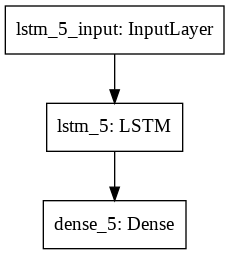

In [14]:
#	The Sequential class that will initialise RNN
# The Dense class create the output layer of RNN
# The LSTM class make RNN have "Long Memory"


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#Create the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
#1 because we have just 1 col input
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#training model 
#epochs = 256 for better convergence
regressor.fit(X_train,y_train,batch_size=32,epochs=200)



from keras.utils import plot_model
plot_model(regressor, to_file='regressor.png')





### Part3: making the prediction and Visualising the results

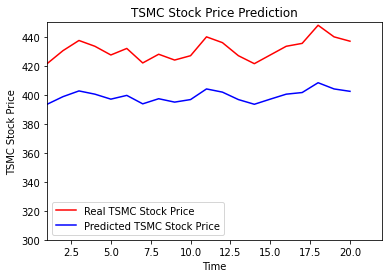

In [24]:
#Getting the real stock price of 2020 
test_set = pd.read_csv('TSMC_Stock_Test_data.csv')
real_stock_price = test_set.iloc[:,1:2].values

#Getting the predicted stock price of 2020
inputs = real_stock_price
inputs = normal.transform(inputs)
inputs = np.reshape(inputs,(21,1,1))

predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = normal.inverse_transform(predicted_stock_price)
##print(predicted_stock_price)



#Visualising the results
plt.ylim(300, 450)
plt.xlim(1, 22)
plt.plot(real_stock_price,color = 'red',label = 'Real TSMC Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label= 'Predicted TSMC Stock Price')
plt.title('TSMC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSMC Stock Price') 
plt.legend()
plt.show()

# Making predictions for the entire dataset
# Getting the real stock price of 2015 - 2020
real_stock_price_train = pd.read_csv('TSMC_Stock_Train_data.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values



